In [1]:
%matplotlib inline
from astropy.table import Table, join
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
original = fits.open('/home/aalvarez/Work/Data/SC8/PHZ_Prod_18oct2021/NnpzGalaxyPP/develop.fits')

In [3]:
refactor = fits.open('/home/aalvarez/Work/Data/SC8/PHZ_Prod_18oct2021/NnpzGalaxyPP/cpp.fits')

# Verify additional HDUs

In [4]:
set([o.name for o in original]).difference([r.name for r in refactor])

set()

In [5]:
for o in original[2:]:
    print(o.name)
    r = refactor[o.name]
    assert not (set(o.data.dtype.names).difference(r.data.dtype.names))
    for col in o.data.dtype.names:
        print('\t', col)
        assert np.array_equal(o.data[col], r.data[col])

BINS_MC_PDF_1D_Z
	 BINS_PDF
BINS_MC_PDF_1D_LOG_STELLARMASS
	 BINS_PDF
BINS_MC_PDF_1D_SFR
	 BINS_PDF
BINS_MC_PDF_2D_Z_LOG_STELLARMASS
	 Z
	 LOG_STELLARMASS
BINS_MC_COUNT_GAL_TYPE
	 BINS
BINS_MC_COUNT_SFH_TYPE
	 BINS
BINS_MC_SLICE_AGGREGATE_SFH_TAU_SFH_TYPE_AVG
	 SFH_TYPE


# Verify main HDU

In [6]:
odata = original[1].data
rdata = refactor[1].data
print(set(odata.dtype.names).difference(rdata.dtype.names))

{'FLAGS_1'}


In [7]:
assert np.array_equal(odata['OBJECT_ID'], rdata['OBJECT_ID'])

In [8]:
ozbins = original['BINS_MC_PDF_1D_Z'].data
rzbins = refactor['BINS_MC_PDF_1D_Z'].data

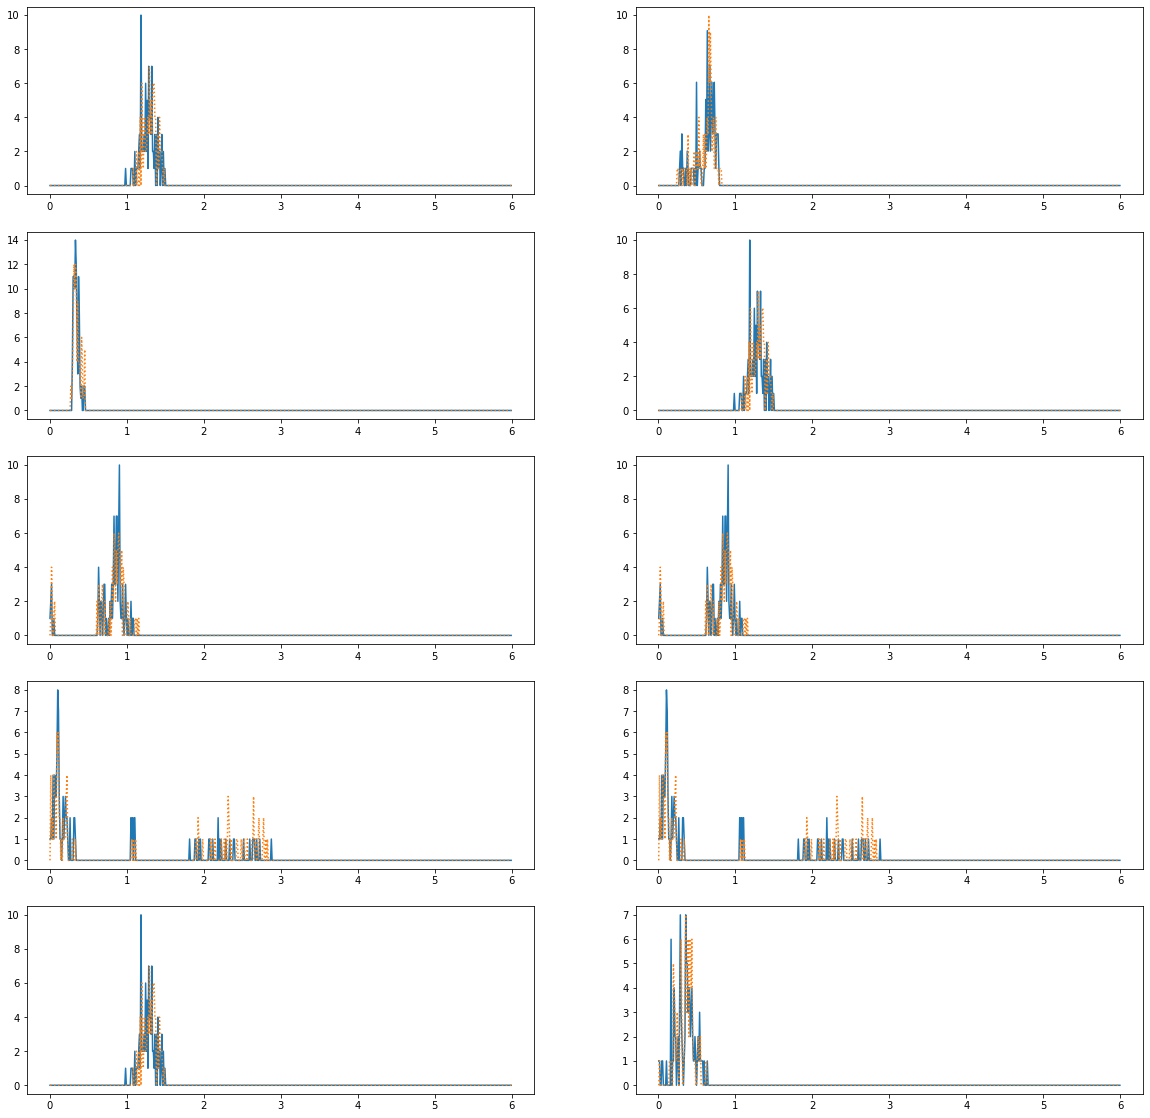

In [9]:
idx = np.random.choice(len(refactor), 10)

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(20,20))

for i, ax in zip(idx, axes.ravel()):
    assert odata['OBJECT_ID'][i] == rdata['OBJECT_ID'][i]
    ax.plot(ozbins, odata['MC_PDF_1D_Z'][i], linestyle='-')
    ax.plot(rzbins, rdata['MC_PDF_1D_Z'][i], linestyle=':')

In [10]:
ostellarbins = original['BINS_MC_PDF_1D_LOG_STELLARMASS'].data
rstellarbins = refactor['BINS_MC_PDF_1D_LOG_STELLARMASS'].data

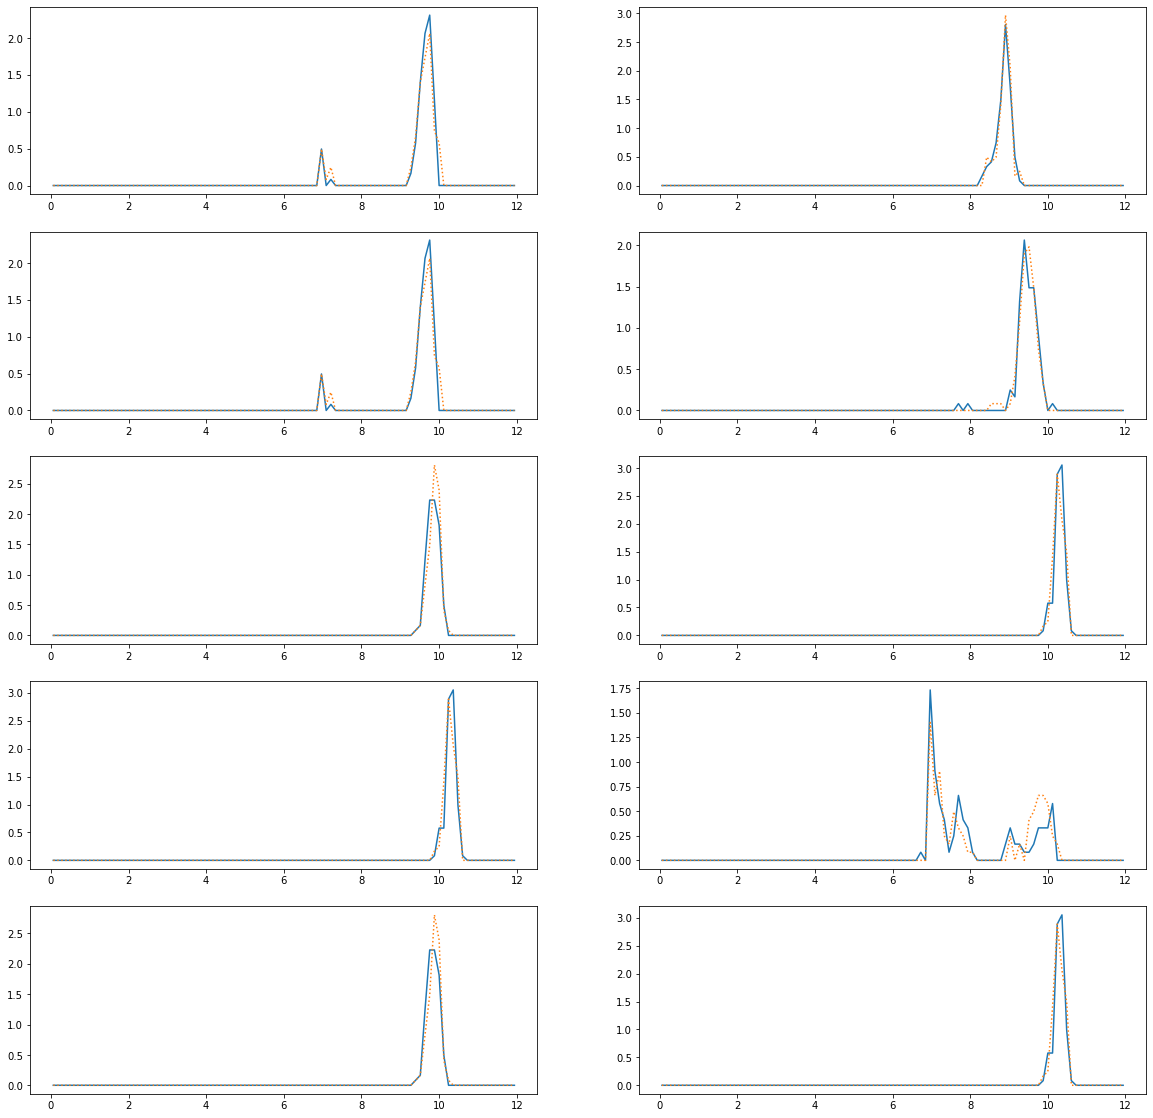

In [11]:
idx = np.random.choice(len(refactor), 10)

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(20,20))

for i, ax in zip(idx, axes.ravel()):
    assert odata['OBJECT_ID'][i] == rdata['OBJECT_ID'][i]
    ax.plot(ostellarbins, odata['MC_PDF_1D_LOG_STELLARMASS'][i], linestyle='-')
    ax.plot(rstellarbins, rdata['MC_PDF_1D_LOG_STELLARMASS'][i], linestyle=':')

In [12]:
np.sort(odata['NEIGHBOR_WEIGHTS'][0]), np.sort(rdata['NEIGHBOR_WEIGHTS'][0])

(array([0.3997688 , 0.40410444, 0.40503517, 0.40721917, 0.40903232,
        0.41127896, 0.41646957, 0.41966125, 0.4265433 , 0.42885536,
        0.43486118, 0.44111496, 0.44604373, 0.4478496 , 0.4483755 ,
        0.44947985, 0.4662926 , 0.46834403, 0.47891384, 0.4805278 ,
        0.4877211 , 0.52096355, 0.5218413 , 0.5279033 , 0.5529319 ,
        0.5718402 , 0.5821945 , 0.6012298 , 0.60763294, 0.6396588 ],
       dtype=float32),
 array([0.39976886, 0.40410447, 0.40503517, 0.40721914, 0.40903232,
        0.411279  , 0.41646954, 0.41966125, 0.42654327, 0.42885536,
        0.4348612 , 0.441115  , 0.44604373, 0.44784957, 0.44837546,
        0.44947985, 0.4662926 , 0.46834403, 0.47891387, 0.4805278 ,
        0.4877211 , 0.52096355, 0.5218413 , 0.5279033 , 0.5529319 ,
        0.5718402 , 0.58219445, 0.6012298 , 0.60763294, 0.6396588 ],
       dtype=float32))